## Bandit Fill in the Blanks Exercise
The following code outline copied from git repo
1. Class Bandit
2. Epsilon greedy loop
3. Print results

### Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

### Constants

In [2]:
NUM_TRIALS = 10000
EPS = 0.1
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

### Bandit Class

In [3]:
class BanditArm:
    def __init__(self, p):
        # p: the win rate
        self.p = p
        self.p_estimate = 0. # Nothing known initially - initialize as None
        self.N = 0. # No trials run yet - initialize as 0

    def pull(self):
        # draw a 1 with probability p
        return np.random.random() < self.p

    def update(self, x):
        self.N += 1 # An update represents a trial - increment by 1
        self.p_estimate = (self.p_estimate + 1/self.N*(x - self.p_estimate))

### Experiment

In [4]:
def experiment():
    bandits = [BanditArm(p) for p in BANDIT_PROBABILITIES]
    rewards = np.zeros(NUM_TRIALS)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_j = np.argmax([b.p for b in bandits])
    print("optimal j index:", optimal_j)

    for i in range(NUM_TRIALS):

        # use epsilon-greedy to select the next bandit
        if np.random.random() < EPS:
            num_times_explored += 1
            j = bandits.index(random.choice(bandits)) # Select index of a bandit at random
        else:
            num_times_exploited += 1
            j = np.argmax([b.p_estimate for b in bandits]) # Exploited means pick the optimal bandit as it is so far thought to be

        if j == optimal_j:
            num_optimal += 1

        # pull the arm for the bandit with the largest sample
        x = bandits[j].pull()

        # update rewards log
        rewards[i] = x

        # update the distribution for the bandit whose arm we just pulled
        bandits[j].update(x)
    # print mean estimates for each bandit
    for b in bandits:
        print("mean estimate:", b.p_estimate)    

    # print total reward
    print("total reward earned:", rewards.sum())
    print("overall win rate:", rewards.sum() / NUM_TRIALS)
    print("num_times_explored:", num_times_explored)
    print("num_times_exploited:", num_times_exploited)
    print("num times selected optimal bandit:", num_optimal)

    # plot the results
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(NUM_TRIALS)*np.max(BANDIT_PROBABILITIES))
    plt.show()

optimal j index: 2
mean estimate: 0.23040380047505912
mean estimate: 0.5013850415512471
mean estimate: 0.7487524408765462
total reward earned: 7180.0
overall win rate: 0.718
num_times_explored: 1028
num_times_exploited: 8972
num times selected optimal bandit: 9218


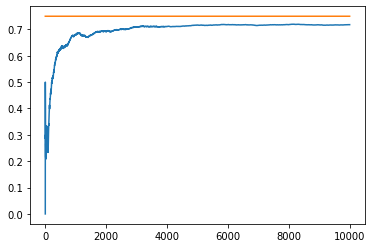

In [5]:
experiment()